In [1]:
from scipy.integrate import odeint
import numpy as np
from math import sqrt, pi
import matplotlib.pyplot as plt
from scipy import stats 

Смоделируем белый шум с инетенсивнотью сигма^2 = 1000 и шагом дискретизации h = 2

Смоделировать выборку достаточно большую (100000)

In [2]:
norm_rv = stats.norm(loc=0, scale=1) 
U1 = norm_rv.rvs(10000) 
print(pi)

3.141592653589793


In [3]:
U1[:10]

array([-0.21686435, -0.59365537,  0.39376959, -0.84169812, -0.72721777,
        0.41526402,  2.10270535, -0.10537662, -0.26534144,  0.8762427 ])

In [122]:
beta = 0.2
omega = 2 * pi / 3
k = omega**2
mu = beta * omega
nu=sqrt(1 - beta**2) * omega
sigma = 10

h = 0.01 * ((2 * pi) / omega) # шаг интегрирования
T_1 = 10 * 2 * pi / omega # интервал
n = int(np.round(T_1 / h))
T_0 = np.linspace(0, T_1, n)

print(h)
print(len(T_0))

0.03
1000


In [123]:
A = np.array([[0, 1], [-(omega**2), -(2 * beta * omega)]])
B = np.array([[0], [k]])
print(A, "\n",  B)

[[ 0.          1.        ]
 [-4.38649084 -0.83775804]] 
 [[0.        ]
 [4.38649084]]


In [124]:
D_ksi = sigma**2 * k**2 / (4 * beta * omega**3)
D_ksi1 = sigma**2 * k**2 / (4 * beta * omega)

t = np.linspace(0, T_0, 100)

In [125]:
X = np.zeros((n, 2, 1))
X[0] = np.array([[np.random.normal(0, sqrt(D_ksi))], [np.random.normal(0, sqrt(D_ksi1))]])

print(X[0])

[[17.33955728]
 [38.3016259 ]]


Метод Эйлера

In [126]:
i = 0

for i in range(int(n)-1):
    X[i+1] = X[i] + A @ (X[i]) * h + B * (sigma * sqrt(h) * U1[i])
    i = i + 1

print(X)


[[[17.33955728]
  [38.3016259 ]]

 [[18.48860606]
  [33.40955272]]

 [[19.49089264]
  [25.62650515]]

 ...

 [[ 1.83663086]
  [-3.62458691]]

 [[ 1.72789325]
  [-8.92400915]]

 [[ 1.46017298]
  [-5.13745654]]]


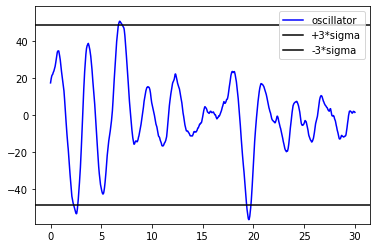

In [127]:
plt.plot(T_0, np.squeeze(X[:,0]), 'b', label = 'oscillator')
plt.axhline(y=-3*np.sqrt(D_ksi), color='k', label = '+3*sigma')
plt.axhline(y=3*np.sqrt(D_ksi), color='k', label = '-3*sigma')
plt.ylim([-3*np.sqrt(D_ksi)-10, 3*np.sqrt(D_ksi)+10])
plt.legend()
plt.show()

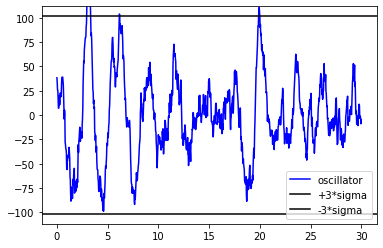

In [128]:
plt.plot(T_0, np.squeeze(X[:,1]), 'b', label = 'oscillator')
plt.axhline(y=-3*np.sqrt(D_ksi1), color='k', label = '+3*sigma')
plt.axhline(y=3*np.sqrt(D_ksi1), color='k', label = '-3*sigma')
plt.ylim([-3*np.sqrt(D_ksi1)-10, 3*np.sqrt(D_ksi1)+10])
plt.legend()
plt.show()

2.

h0 - шаг, с которым поступают наблюденияб h0<(pi/(2*omega))

N - размер окна. больше 100 и меньше размера всей выборки

In [129]:
n0 = 10
J = int(np.round(n/n0))

S = np.squeeze(X[:,0][::n0])

T_n0 = np.linspace(0, n*h, J)
print(len(S), len(T_n0))

100 100


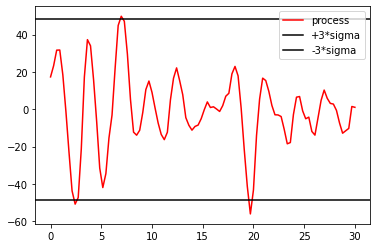

In [130]:
plt.plot(T_n0, S, 'r', label = 'process')
plt.axhline(y=-3*np.sqrt(D_ksi), color='k', label = '+3*sigma')
plt.axhline(y=3*np.sqrt(D_ksi), color='k', label = '-3*sigma')
plt.legend()
plt.show()

In [131]:
m = 0
D = 0
sum_m = 0
sum_D = 0


for k in range(J):
    sum_m = sum_m + S[k]
    k = k + 1

m = (1 / J) * sum_m
print(m)

-0.7354612066618347


In [132]:
for k in range(J):
    sum_D = sum_D + (S[k] - m)**2
    k = k + 1
    
D = (1/J) * sum_D
print(D)

406.8082804619982


#### Пункт 2

оценка спектральной плотности и ковариационной функции

J - объем выборки из всех наблюдений
N - размер окна(объем подвыборки)

в ковариационной функции тоже будут колебания. по времени отличие в полфазы

0 <= tau <= s_(J-1)-s(N-1)

tau_max = s_(J-1)-s(N-1) = (J - N) * h0 = 2 * (2pi/omega)

N = J - (tau_max / h0) = J - ( (1/n0) * (tau_max/h) )

ВАРИАНТ а)

h = (2pi/omega)*0.01

n0 = 2 h0 = (2pi)*(1/50)

J = 500

K = 4pi/(omega*h0) = 2* 50 = 100

T0 = 2pi/omega * 10

ВЫВОД: интервал колебаний маленький. но частота "снятия" наблюдений хорошая

ВАРИАНТ б)

T0 = 2pi/omega * 50

n0 =10  h0 = (2pi)*(1/10)

ВСЕ ОСТАЛЬНОЕ ОСТАЕТСЯ ТАКИМ ЖЕ

In [133]:
tau_max = (2 * 2 * pi) / omega
#tau = 0.85 * tau_max
print(tau_max)

print(J, n)

6.0
100 1000


In [134]:
T0 = (2 * pi * 50) / omega

#print(T0)
n0 = 10
h0 = h * n0
print(h0)
K = int(tau_max / h0)
J = int(np.round(n/n0))
print(K)
N = J - K
print(N)

tau = T_n0[:K]
print(len(tau))

0.3
20
80
20


In [135]:
r = np.zeros(len(tau))
i = 0

for i in range(len(tau)):
    	for j in range(int(N)):
        	r[i] += S[j] * S[j + i]
    	r[i] = r[i] / N

Ковариационная функция, построенная по реальным наблюдениям

In [136]:
tau_real = np.linspace(0, max(tau), 100)
r_real = np.zeros(len(tau_real))

In [137]:
for i in range(len(tau_real)):
    r_real[i] = D_ksi * np.exp(-beta*omega*tau_real[i])*(np.cos(nu*tau_real[i])+beta/
                                                         (np.sqrt(1 - beta**2))*np.sin(nu*tau_real[i]))

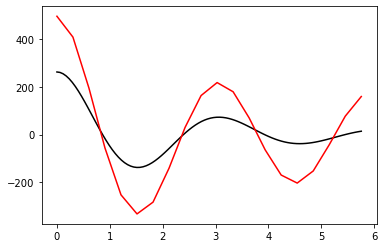

In [138]:
plt.plot(tau_real, r_real, 'k')
plt.plot(tau, r, 'r')
plt.show()

In [139]:
N = len(r)
print(N)

20


In [140]:
lbd = np.linspace(-np.pi, np.pi, n)
N = len(r)
def KSI(lbd, N):
    est = 0
    for k in range(N):
        est += r[k] * np.exp(-1 * 1j * k * lbd)
    return np.absolute(est / (2 * np.pi * N))**2



In [141]:
spec_est = np.zeros(len(lbd))

In [142]:
for i in range(len(spec_est)):
    spec_est[i] = KSI(lbd[i], N)

In [143]:
spec_real = np.zeros(len(lbd))

In [144]:
for i in range(len(lbd)):
    spec_real[i] = 1/(2*np.pi) * (k / (omega**2))**2 / (((lbd[i]/omega)**2 - 1)**2 + (2*beta*lbd[i]/omega)**2)

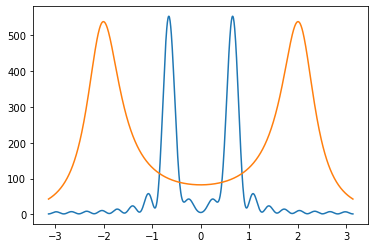

In [145]:
plt.plot(lbd, spec_est)
plt.plot(lbd, spec_real)
plt.show()

3

In [146]:
ref_dict = {}
for i in range(len(T_0)):
    ref_dict.update([(T_0[i], float(X[i,0]))])

In [147]:
def dict_search(ref_dict, t):
    key = None
    diff = 1000
    for time, _ in ref_dict.items():
        if abs(time - t) < diff:
            diff = abs(time - t)
            key = time
    return ref_dict.get(key)

In [148]:
R, R1, C = 3, 2, 5
T = (R + R1) * C
T1 = R1 * C
z0 = 0

x = np.squeeze(X[:,0])

In [149]:
def pend(z, t, R, L):
    x = dict_search(ref_dict, t)
    dzdt = x / T + x / T * T1 / T - z / T
    return dzdt

In [150]:
z = np.squeeze(odeint(pend, z0, T_0, args=(T, T1)))

In [152]:
def y(t, z, x, T, T1):
    res = z.copy()
    for i in range(len(t)):
        res[i] += x[i] * (T1 / T)
    return res

In [153]:
y = y(T_0, z, x, T, T1)

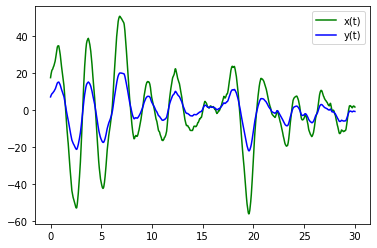

In [162]:
plt.plot(T_0, x, 'green', label = 'x(t)')
plt.plot(T_0, y, 'blue', label = 'y(t)')
plt.legend()
plt.show()

4

In [155]:
n = 1000
lbd = np.linspace(-np.pi, np.pi, n)
N = len(r)


In [156]:
def KSI(lbd, N):
    est = 0
    for k in range(N):
        est += r[k] * np.exp(-1 * 1j * k * lbd)
    return np.absolute(est / (2 * np.pi * N))**2


In [157]:
spec_est = np.zeros(len(lbd))

In [158]:
for i in range(len(spec_est)):
    spec_est[i] = KSI(lbd[i], N)


In [159]:
H =  lambda x: (R) / (1 + 1j*x*R)
spec_real_out = np.zeros(len(spec_real))
for i in range(len(spec_real_out)):
    spec_real_out[i] = np.absolute(H(lbd[i]))**2*spec_real[i]

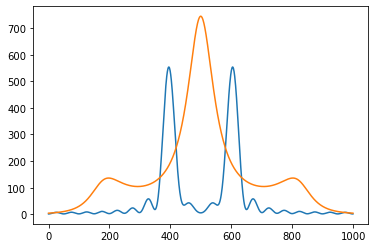

In [160]:
plt.plot(spec_est)
plt.plot(spec_real_out)
plt.show()

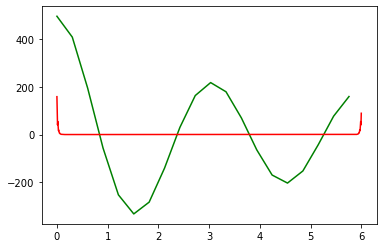

In [161]:
a = np.empty(len(lbd))
a[0] = spec_real_out[500]

for i in range(1,len(lbd)//2):
	a[i] = spec_real_out[len(lbd)//2+i]
for i in range(len(lbd)//2,len(a)):
	a[i] = spec_real_out[i-len(lbd)//2]
    
r_real_out = np.fft.ifft(a).real

tau_real = np.linspace(0, tau_max, 1000)

plt.plot(tau,r,'g')
plt.plot(tau_real,r_real_out,'r')
plt.show()
